In [1]:
import aj_2p_functions as aj
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import scale
from scipy.spatial.distance import cdist, pdist, squareform

import statsmodels.formula.api as smf


In [2]:
# THIS cell for leading data

files = ["716782_ms1", "716782_ms2", "719039_ms3", "716782_ms4", "719038_ms4", "719039_ms4", "719039_ms2"]

mice = [pickle.load(open(f, 'rb')) for f in files]

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold

In [18]:
mouse = mice[0]                                                     # pick a mouse
sess  = aj.behaviour_sessions[3]                                    # pick a session

day = mouse.days[sess]                                              # extracting data from object

C = day.traces                                                      # pull out C matrix of fluorescence, cells x time
active = ~np.sum(day.traces, axis=1).mask
C = C[active, :].data                                               # restrict to active cells only

cs_plus = day.behaviour.downsample.cs.cs_plus                       # get our target vector (0s for not tone, 1s for tone)

X = C.T                                                             # transposing C matrix to get matrix of observations (time bins) x features (neurons)
y = cs_plus

shuffle_idx = np.random.permutation(np.arange(len(y)))              # get shuffled indices
X = X[shuffle_idx, :]                                               # apply smae shuffled indices to X and y
y = y[shuffle_idx]

cv = KFold(n_splits=3)                                                          
for i, (train_index, test_index) in enumerate(cv.split(X)):
    X_train, X_test = X[train_index, :], X[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

    model = SVC(kernel="linear")
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    print(f"Accuracy: {accuracy}")


Accuracy: 0.8946428571428572
Accuracy: 0.900625
Accuracy: 0.8994642857142857


In [13]:
np.arange(len(y))

array([    0,     1,     2, ..., 33597, 33598, 33599])

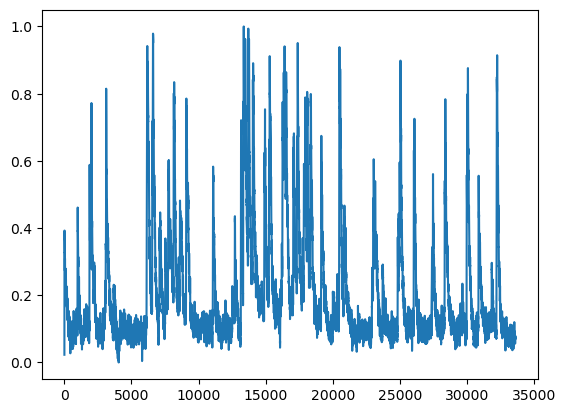

In [10]:
plt.plot(C[0,:])